In [1]:
import numpy as np
import random


In [2]:
def criterio_paro(gradiente, tol):
    return np.linalg.norm(gradiente) < tol


### Método 1: Descenso de Gradiente Naïve con Dirección Aleatoria

In [3]:
def descenso_gradiente_naive_aleatorio(f, df, x0, alpha, maxIter, tol):
    xk = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for k in range(maxIter):
        # Dirección de descenso aleatoria
        direccion = np.random.randn(*xk.shape)
        direccion /= np.linalg.norm(direccion)  # Normalizamos
        
        xk = xk - alpha * direccion
        iteraciones.append(xk)
        valores_f.append(f(xk))
        
        # Error basado en el criterio de paro (norma del gradiente)
        gradiente = df(xk)
        error = np.linalg.norm(gradiente)
        errores.append(error)
        
        if criterio_paro(gradiente, tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False


### Método 2: Descenso Máximo Naïve

In [24]:
def descenso_maximo_naive(f, df, x0, alpha, maxIter, tol):
    xk = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for k in range(maxIter):
        # Direccion de máximo descenso es el negativo del gradiente
        direccion = -df(xk)
        
        xk = xk - alpha * direccion
        iteraciones.append(xk)
        valores_f.append(f(xk))
        
        # Error basado en el criterio de paro (norma del gradiente)
        gradiente = df(xk)
        error = np.linalg.norm(gradiente)
        errores.append(error)
        
        if criterio_paro(gradiente, tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False


### Método 3: Descenso de Gradiente de Newton (con Hessiano Aproximado)

In [5]:
def descenso_newton_aproximado(f, df, x0, alpha, maxIter, tol):
    xk = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    # Inicialización de una matriz identidad como aproximación inicial del Hessiano
    Hk = np.eye(len(x0))
    
    for k in range(maxIter):
        gradiente = df(xk)
        direccion = -np.dot(Hk, gradiente)  # Direccion del descenso de Newton aproximado
        
        xk_new = xk + alpha * direccion
        
        sk = xk_new - xk
        yk = df(xk_new) - gradiente
        
        xk = xk_new
        iteraciones.append(xk)
        valores_f.append(f(xk))
        
        # Actualización del Hessiano utilizando la fórmula de BFGS
        rho_k = 1.0 / np.dot(yk.T, sk)
        Hk = (np.eye(len(xk)) - rho_k * np.outer(sk, yk)).dot(Hk).dot(np.eye(len(xk)) - rho_k * np.outer(yk, sk)) + rho_k * np.outer(sk, sk)
        
        # Error basado en el criterio de paro
        error = np.linalg.norm(gradiente)
        errores.append(error)
        
        if criterio_paro(gradiente, tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False


### Método 4: Descenso de Gradiente de Newton (con Hessiano Exacto)

In [6]:
def descenso_newton_exacto(f, df, ddf, x0, alpha, maxIter, tol):
    xk = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for k in range(maxIter):
        gradiente = df(xk)
        Hessiano = ddf(xk)
        
        direccion = -np.linalg.solve(Hessiano, gradiente)  # Direccion de Newton exacta
        
        xk = xk + alpha * direccion
        iteraciones.append(xk)
        valores_f.append(f(xk))
        
        # Error basado en el criterio de paro
        error = np.linalg.norm(gradiente)
        errores.append(error)
        
        if criterio_paro(gradiente, tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False


In [25]:
def f(x):
    return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1

def df(x):
    return np.array([
        4*x[0]**3 - 4*x[1], 
        4*x[1]**3 - 4*x[0] + 0.5, 
        0,
        0
    ])

def ddf(x):
    return np.array([
        [12*x[0]**2, -4, 0, 0],
        [-4, 12*x[1]**2, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ])


# Punto inicial
x0 = np.array([-3.0, 1.0, -3.0, 1.0])

# Parámetros
alpha = 0.1
maxIter = 100
tol = 1e-6

# Ejecutamos los métodos
resultado_naive_aleatorio = descenso_gradiente_naive_aleatorio(f, df, x0, alpha, maxIter, tol)

print("Resultado:", resultado_naive_aleatorio[0])


resultado_maximo_naive = descenso_maximo_naive(f, df, x0, alpha, maxIter, tol)
resultado_newton_aproximado = descenso_newton_aproximado(f, df, x0, alpha, maxIter, tol)
resultado_newton_exacto = descenso_newton_exacto(f, df, ddf, x0, alpha, maxIter, tol)


Resultado: [-3.57168278  1.49091887 -2.82588479  1.28463343]


C:\Users\rentt\AppData\Local\Temp\ipykernel_22900\2148770513.py:2: RuntimeWarning: overflow encountered in scalar power
  return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1
C:\Users\rentt\AppData\Local\Temp\ipykernel_22900\2148770513.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1
C:\Users\rentt\AppData\Local\Temp\ipykernel_22900\2148770513.py:6: RuntimeWarning: overflow encountered in scalar power
  4*x[0]**3 - 4*x[1],
C:\Users\rentt\AppData\Local\Temp\ipykernel_22900\2148770513.py:7: RuntimeWarning: overflow encountered in scalar power
  4*x[1]**3 - 4*x[0] + 0.5,


LinAlgError: Singular matrix

In [8]:
import matplotlib.pyplot as plt

def mostrar_resultados(nombre_metodo, x_final, iteraciones, valores_f, errores, num_iter, convergencia):
    print(f"--- {nombre_metodo} ---")
    print(f"Última solución encontrada (x): {x_final}")
    print(f"Número de iteraciones: {num_iter}")
    print(f"Convergencia: {'Sí' if convergencia else 'No'}")
    print(f"Valores de la función objetivo f(x) en cada iteración:")
    for i, valor in enumerate(valores_f):
        print(f"Iteración {i}: f(x) = {valor}")
    
    print(f"\nErrores (norma del gradiente) en cada iteración:")
    for i, error in enumerate(errores):
        print(f"Iteración {i}: Error = {error}")
    
    # Graficar valores de la función objetivo y errores
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Gráfico de f(x) vs iteraciones
    ax[0].plot(range(num_iter+1), valores_f, marker='o', label='f(x)')
    ax[0].set_title(f'{nombre_metodo}: f(x) vs Iteraciones')
    ax[0].set_xlabel('Iteración')
    ax[0].set_ylabel('f(x)')
    ax[0].grid(True)
    ax[0].legend()

    # Gráfico de errores vs iteraciones
    ax[1].plot(range(num_iter), errores, marker='o', color='r', label='Error')
    ax[1].set_title(f'{nombre_metodo}: Error vs Iteraciones')
    ax[1].set_xlabel('Iteración')
    ax[1].set_ylabel('Error')
    ax[1].grid(True)
    ax[1].legend()

    plt.tight_layout()
    plt.show()


# Mostrar resultados

--- Descenso Gradiente Naïve con Dirección Aleatoria ---
Última solución encontrada (x): [-3.57168278  1.49091887 -2.82588479  1.28463343]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 95.5
Iteración 1: f(x) = 99.32498830831734
Iteración 2: f(x) = 94.93324565283852
Iteración 3: f(x) = 92.91122676307386
Iteración 4: f(x) = 84.95998880647542
Iteración 5: f(x) = 77.09053038835013
Iteración 6: f(x) = 81.82378916485187
Iteración 7: f(x) = 78.89783712948986
Iteración 8: f(x) = 76.97843580537209
Iteración 9: f(x) = 78.52712934957916
Iteración 10: f(x) = 81.22090804869495
Iteración 11: f(x) = 76.36020160793957
Iteración 12: f(x) = 73.42520011476009
Iteración 13: f(x) = 72.29043697206049
Iteración 14: f(x) = 78.17554674668578
Iteración 15: f(x) = 87.15494728042611
Iteración 16: f(x) = 77.36546741375133
Iteración 17: f(x) = 75.50560481328462
Iteración 18: f(x) = 79.7180338918213
Iteración 19: f(x) = 79.64904421992217
Iterac

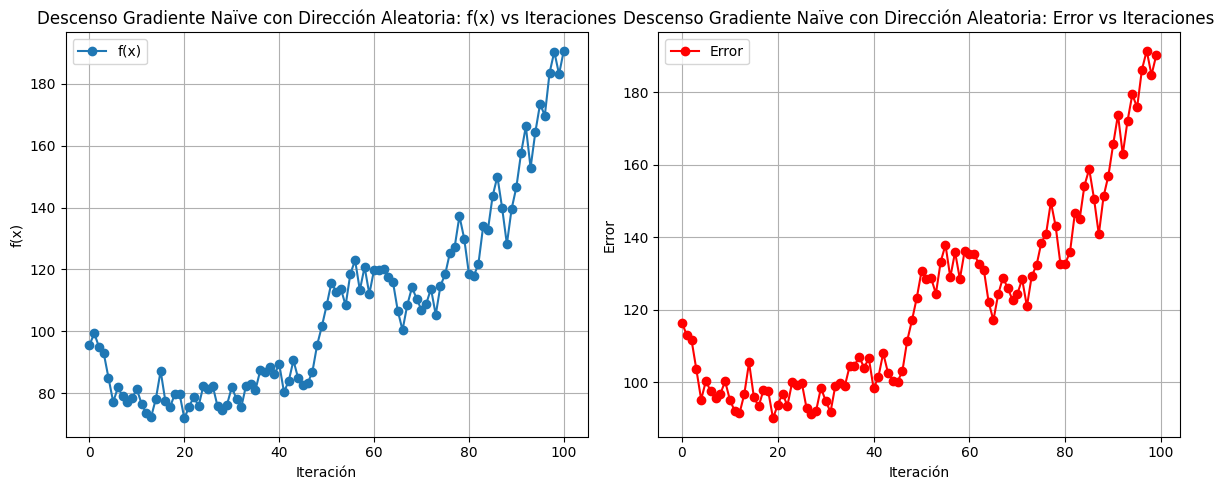

In [28]:

mostrar_resultados("Descenso Gradiente Naïve con Dirección Aleatoria", *resultado_naive_aleatorio)

--- Descenso Máximo Naïve ---
Última solución encontrada (x): [-inf  inf  -3.   1.]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 95.5
Iteración 1: f(x) = 40860.85010625001
Iteración 2: f(x) = 1814233477756.4434
Iteración 3: f(x) = 1.5287013157215038e+35
Iteración 4: f(x) = 9.14550904098098e+103
Iteración 5: f(x) = inf
Iteración 6: f(x) = inf
Iteración 7: f(x) = inf
Iteración 8: f(x) = inf
Iteración 9: f(x) = inf
Iteración 10: f(x) = inf
Iteración 11: f(x) = inf
Iteración 12: f(x) = inf
Iteración 13: f(x) = inf
Iteración 14: f(x) = inf
Iteración 15: f(x) = inf
Iteración 16: f(x) = inf
Iteración 17: f(x) = inf
Iteración 18: f(x) = inf
Iteración 19: f(x) = inf
Iteración 20: f(x) = inf
Iteración 21: f(x) = inf
Iteración 22: f(x) = inf
Iteración 23: f(x) = inf
Iteración 24: f(x) = inf
Iteración 25: f(x) = inf
Iteración 26: f(x) = inf
Iteración 27: f(x) = inf
Iteración 28: f(x) = inf
Iteración 29: f(x) = inf
Iteración 

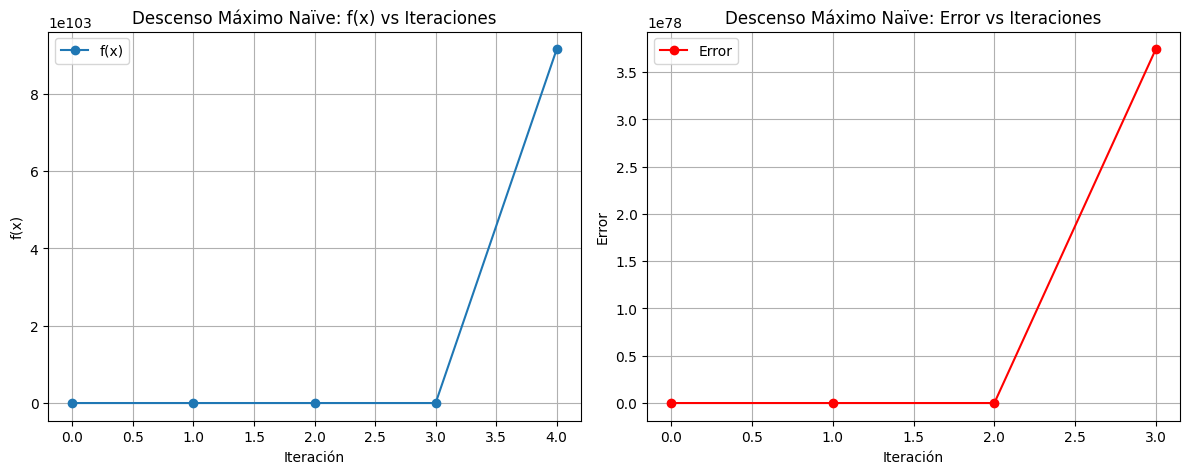

In [29]:
mostrar_resultados("Descenso Máximo Naïve", *resultado_maximo_naive)

--- Descenso Gradiente de Newton Aproximado ---
Última solución encontrada (x): [ 0.99032664  0.95960011 -3.          1.        ]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 95.5
Iteración 1: f(x) = 4543.391106250003
Iteración 2: f(x) = 2615.7269059123346
Iteración 3: f(x) = 4052.5050998103925
Iteración 4: f(x) = 2873.6631944289816
Iteración 5: f(x) = 2517.6985545376247
Iteración 6: f(x) = 2205.6367777532478
Iteración 7: f(x) = 1931.9225269060223
Iteración 8: f(x) = 1692.021322390149
Iteración 9: f(x) = 1481.7614375260448
Iteración 10: f(x) = 1297.4902219694006
Iteración 11: f(x) = 1136.0043664724985
Iteración 12: f(x) = 994.4948196904497
Iteración 13: f(x) = 870.4982961420607
Iteración 14: f(x) = 761.8547507867927
Iteración 15: f(x) = 666.670081401961
Iteración 16: f(x) = 583.2834163726437
Iteración 17: f(x) = 510.23842428625517
Iteración 18: f(x) = 446.25815099447016
Iteración 19: f(x) = 390.222950558306
Itera

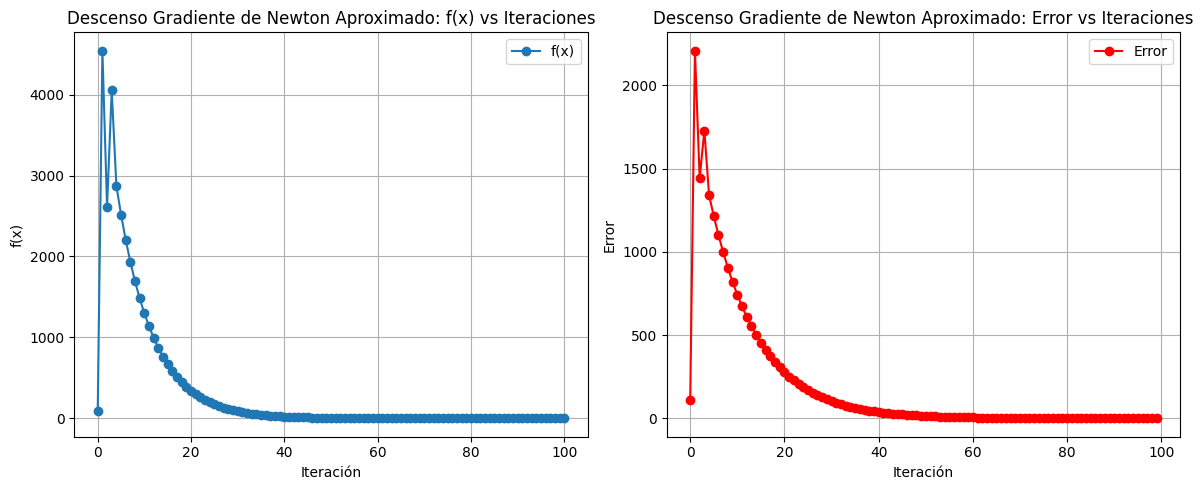

In [30]:
mostrar_resultados("Descenso Gradiente de Newton Aproximado", *resultado_newton_aproximado)

--- Descenso Gradiente de Newton Exacto ---
Última solución encontrada (x): [-2.01985536 -8.08354783]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 95.5
Iteración 1: f(x) = 83.22674169782961
Iteración 2: f(x) = 72.3737765875911
Iteración 3: f(x) = 62.69270541882499
Iteración 4: f(x) = 53.857622822745654
Iteración 5: f(x) = 44.99119121726772
Iteración 6: f(x) = 1459052469.4321358
Iteración 7: f(x) = 1274024576.4448144
Iteración 8: f(x) = 1112460746.3172235
Iteración 9: f(x) = 971385416.3754364
Iteración 10: f(x) = 848200365.7578406
Iteración 11: f(x) = 740636863.3452709
Iteración 12: f(x) = 646713883.9836785
Iteración 13: f(x) = 564701623.4574281
Iteración 14: f(x) = 493089640.25966305
Iteración 15: f(x) = 430559037.4190267
Iteración 16: f(x) = 375958172.04871345
Iteración 17: f(x) = 328281445.254742
Iteración 18: f(x) = 286650781.7720562
Iteración 19: f(x) = 250299458.23442486
Iteración 20: f(x) = 218557982.239474

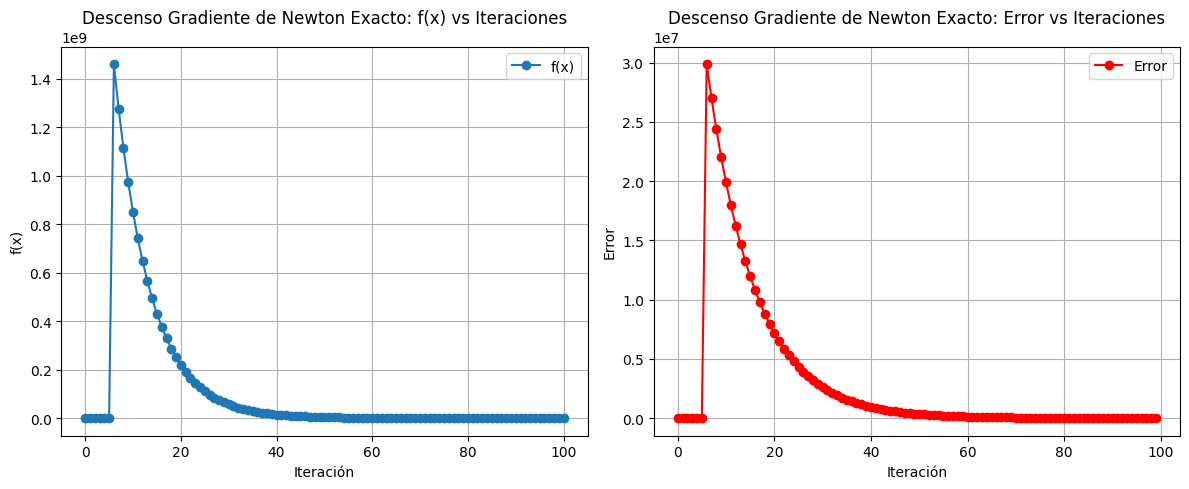

In [31]:
mostrar_resultados("Descenso Gradiente de Newton Exacto", *resultado_newton_exacto)